# PCAP

Ref: https://medium.com/hackervalleystudio/learning-packet-analysis-with-data-science-5356a3340d4e

https://scapy.readthedocs.io/en/latest/usage.html#reading-pcap-files

### Download files

In [1]:
!wget https://drive.google.com/uc?id=1uOszN_l-hFd2eCAc4I_RWQSJTor8Zsps -O suspicious.pcap

--2022-03-16 06:22:16--  https://drive.google.com/uc?id=1uOszN_l-hFd2eCAc4I_RWQSJTor8Zsps
Resolving drive.google.com (drive.google.com)... 142.251.107.100, 142.251.107.102, 142.251.107.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9b3e978m0usvg31rog7kcbrfqso24rho/1647411675000/17174434063503717705/*/1uOszN_l-hFd2eCAc4I_RWQSJTor8Zsps [following]
--2022-03-16 06:22:16--  https://doc-04-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9b3e978m0usvg31rog7kcbrfqso24rho/1647411675000/17174434063503717705/*/1uOszN_l-hFd2eCAc4I_RWQSJTor8Zsps
Resolving doc-04-38-docs.googleusercontent.com (doc-04-38-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to doc-04-38-docs.googleusercontent.com (doc-04-38-docs.googleusercontent.com)|173.194.2

In [2]:
!ls -al

total 52
drwxr-xr-x 1 root root  4096 Mar 16 06:22 .
drwxr-xr-x 1 root root  4096 Mar 16 06:21 ..
drwxr-xr-x 1 root root  4096 Mar  9 14:47 .config
drwxr-xr-x 1 root root  4096 Mar  9 14:48 sample_data
-rw-r--r-- 1 root root 33463 Mar 16 06:22 suspicious.pcap


In [3]:
!curl ipecho.net/plain

35.185.28.175

### Install packages

In [4]:
pip install scapy

     |████████████████████████████████| 1.1 MB 3.2 MB/s 
  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261555 sha256=a4d5e2a8ae7d66d6ca9473fe94543a9a11c3dcab1676ee65fc212e9f319b253e
  Stored in directory: /root/.cache/pip/wheels/b9/6e/c0/0157e466a5e02d3ff28fc7587dff329b4a967a23b3f9b11385
Successfully built scapy


In [5]:
from scapy.all import * # Packet manipulation
# https://scapy.readthedocs.io/en/latest/usage.html # must see

import pandas as pd
import numpy as np
import binascii # Binary to Ascii 
import seaborn as sns

### sniff 100 packets


In [6]:
num_of_packets_to_sniff = 100
pcap = sniff(count=num_of_packets_to_sniff)

In [7]:
print(type(pcap))
print(len(pcap))
print(pcap)

<class 'scapy.plist.PacketList'>
100
<Sniffed: TCP:100 UDP:0 ICMP:0 Other:0>


In [9]:
print(type(pcap[0]))

<class 'scapy.layers.l2.Ether'>


### sniff example


In [10]:
sniff(prn=lambda x: x.show(), count=2)

###[ Ethernet ]### 
  dst       = 02:42:ac:1c:00:02
  src       = 02:42:13:2a:0f:83
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 676
     id        = 62417
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0xec46
     src       = 172.28.0.1
     dst       = 172.28.0.2
     \options   \
###[ TCP ]### 
        sport     = 60230
        dport     = 8080
        seq       = 3705266209
        ack       = 2564094576
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 501
        chksum    = 0x5ad2
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (951576974, 2008752211))]
###[ Raw ]### 
           load      = 'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAAAA&t=N-HPMaG&transport=polling HTTP/1.1\r\nHost: colab.research.google.com\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTM

<Sniffed: TCP:2 UDP:0 ICMP:0 Other:0>

In [11]:
sniff(prn=lambda x: x.summary(), count = 2)

Ether / IP / TCP 172.28.0.3:33560 > 172.28.0.2:9000 A
Ether / IP / TCP 172.28.0.2:9000 > 172.28.0.3:33560 PA / Raw


<Sniffed: TCP:2 UDP:0 ICMP:0 Other:0>

In [12]:
pkts = sniff(prn=lambda x:x.sprintf("{IP:%IP.src% -> %IP.dst%\n}{Raw:%Raw.load%\n}"), count=4)

172.28.0.1 -> 172.28.0.2
'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAAAA&t=N-HPQrw&transport=polling HTTP/1.1\r\nHost: colab.research.google.com\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36,gzip(gfe)\r\nAccept: */*\r\nAccept-Encoding: gzip, deflate, br,gzip(gfe)\r\nAccept-Language: zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7\r\nReferer: https://colab.research.google.com/\r\nSec-Ch-Ua: " Not A;Brand";v="99", "Chromium";v="99", "Google Chrome";v="99"\r\nSec-Ch-Ua-Mobile: ?0\r\nSec-Ch-Ua-Platform: "macOS"\r\nSec-Fetch-Dest: empty\r\nSec-Fetch-Mode: cors\r\nSec-Fetch-Site: same-origin\r\n\r\n'

172.28.0.2 -> 172.28.0.1
'HTTP/1.1 200 OK\r\nContent-Type: text/plain; charset=UTF-8\r\nContent-Encoding: gzip\r\nContent-Length: 1241\r\nAccess-Control-Allow-Origin: *\r\nSet-Cookie: io=Lkd3kmnrP950sb4qAAAA; Path=/; HttpOnly\r\nDate: Wed, 16 Mar 2022 06:23:54 GMT\r\nConnection: keep-alive\r\n\r\n\x1f\\x8b\x08\x00\x00

In [13]:
load_module("p0f")
conf.p0f_base

In [14]:
# may not work
# for passive os fingerprinting
# https://scapy.readthedocs.io/en/latest/usage.html

try:
  p = sniff(prn=prnp0f, count=1)
  p0f(p[0])
except:
  print("not working")

not working


### Append suspicious pcap to current stream


In [15]:
pcap = pcap + rdpcap("suspicious.pcap")

In [16]:
print(len(pcap))
pcap

162


<Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>

### TCP Segment
Frames/Packets/Segments each encapsulated layer consists of fields

In [17]:
"""
0                   1                   2                   3
0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|          Source Port          |       Destination Port        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                        Sequence Number                        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Acknowledgment Number                      |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|  Data |           |U|A|P|R|S|F|                               |
| Offset| Reserved  |R|C|S|S|Y|I|            Window             |
|       |           |G|K|H|T|N|N|                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|           Checksum            |         Urgent Pointer        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Options                    |    Padding    |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                             data                              |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
02 04 05 a0 01 03 03 05 01 01 08 0a 1d 74 65 c5 00 00 00 00 04 02 00 00
"""

# Frames/Packets/Segments all consists of fields
# TODO: Identify how to handle arrays in dataframe

print()

### Exploring an item in packet list

In [18]:
# ETHERNET -> Internet Protocol -> Layer 4 Segments
# We're only interested in Layers 3 (IP) and 4 (TCP AND UDP) 
## We'll parse those two layers and the layer 4 payload
## When capturing we capture layer 2 frames and beyond

# Retrieving a single item from packet list
ethernet_frame = pcap[101]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload # Retrieve payload that comes after layer 4

# Observe that we just popped off previous layer header
print(ethernet_frame.summary())
print(ip_packet.summary())
print(segment.summary())
print(data.summary()) # If blank, empty object

# Complete depiction of paket
## Achieving understanding that these are the fields will enable the ability 
## to ask the data more meaningful questions ie) type of layer 4 segment is defined in layer 3 packet
ethernet_frame.show()

Ether / IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" 
IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" 
UDP / DNS Ans "2607:f8b0:4005:807::200e" 
DNS Ans "2607:f8b0:4005:807::200e" 
###[ Ethernet ]### 
  dst       = 88:e9:fe:6a:92:52
  src       = 80:37:73:96:9b:db
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x20
     len       = 84
     id        = 58919
     flags     = 
     frag      = 0
     ttl       = 122
     proto     = 17
     chksum    = 0x360c
     src       = 84.54.22.33
     dst       = 10.1.10.53
     \options   \
###[ UDP ]### 
        sport     = 53
        dport     = 53
        len       = 64
        chksum    = 0xfe25
###[ DNS ]### 
           id        = 12
           qr        = 1
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 1
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcou

In [19]:
hexdump(pcap[101])

0000  88 E9 FE 6A 92 52 80 37 73 96 9B DB 08 00 45 20  ...j.R.7s.....E 
0010  00 54 E6 27 00 00 7A 11 36 0C 54 36 16 21 0A 01  .T.'..z.6.T6.!..
0020  0A 35 00 35 00 35 00 40 FE 25 00 0C 81 80 00 01  .5.5.5.@.%......
0030  00 01 00 00 00 00 06 67 6F 6F 67 6C 65 03 63 6F  .......google.co
0040  6D 00 00 1C 00 01 C0 0C 00 1C 00 01 00 00 01 2B  m..............+
0050  00 10 26 07 F8 B0 40 05 08 07 00 00 00 00 00 00  ..&...@.........
0060  20 0E                                             .


In [20]:
ls(pcap[101])

dst        : DestMACField                        = '88:e9:fe:6a:92:52' ('None')
src        : SourceMACField                      = '80:37:73:96:9b:db' ('None')
type       : XShortEnumField                     = 2048            ('36864')
--
version    : BitField  (4 bits)                  = 4               ('4')
ihl        : BitField  (4 bits)                  = 5               ('None')
tos        : XByteField                          = 32              ('0')
len        : ShortField                          = 84              ('None')
id         : ShortField                          = 58919           ('1')
flags      : FlagsField                          = <Flag 0 ()>     ('<Flag 0 ()>')
frag       : BitField  (13 bits)                 = 0               ('0')
ttl        : ByteField                           = 122             ('64')
proto      : ByteEnumField                       = 17              ('0')
chksum     : XShortField                         = 13836           ('None')
src       

In [21]:
pcap[101].summary()

'Ether / IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" '

In [22]:
pcap[101].show()

###[ Ethernet ]### 
  dst       = 88:e9:fe:6a:92:52
  src       = 80:37:73:96:9b:db
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x20
     len       = 84
     id        = 58919
     flags     = 
     frag      = 0
     ttl       = 122
     proto     = 17
     chksum    = 0x360c
     src       = 84.54.22.33
     dst       = 10.1.10.53
     \options   \
###[ UDP ]### 
        sport     = 53
        dport     = 53
        len       = 64
        chksum    = 0xfe25
###[ DNS ]### 
           id        = 12
           qr        = 1
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 1
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcount   = 1
           ancount   = 1
           nscount   = 0
           arcount   = 0
           \qd        \
            |###[ DNS Question Record ]### 
            |  qname     = '

See this to show visualized graph of a packet.

https://scapy.readthedocs.io/en/latest/usage.html#graphical-dumps-pdf-ps


### Understanding object types in scapy and Importing layers

In [23]:
# Understanding the object types in scapy
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

# Packets can be filtered on layers ie) ethernet_frame[scapy.layers.l2.Ether]
ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)
print("Ethernet", pcap[ethernet_type])
print("IP", pcap[ip_type])
print("TCP", pcap[tcp_type])

# Scapy provides this via import statements
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP

print("UDP", pcap[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.UDP'>
Ethernet <Ether from Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>
IP <IP from Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>
TCP <UDP from Sniffed+suspicious.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
UDP <UDP from Sniffed+suspicious.pcap: TCP:0 UDP:62 ICMP:0 Other:0>


### Convert PCAP to DataFrame

In [24]:
# Collect field names from IP/TCP/UDP (These will be columns in DF)
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

# Create blank DataFrame
df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[IP]:
    # Field array for each row of DataFrame
    field_values = []
    # Add all IP fields to dataframe
    for field in ip_fields:
        if field == 'options':
            # Retrieving number of options defined in IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    # Append payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    # Add row to DF
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")

### DataFrame


In [25]:
# Return first 5 rows
df.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,676,5944,DF,0,64,6,51424,...,8,0,PA,501,23250,0,3,624,b'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
1,4,5,0,1495,14723,DF,0,64,6,41826,...,8,0,PA,501,24069,0,3,1443,b'HTTP/1.1 200 OK\r\nContent-Type: text/plain;...,b'485454502f312e3120323030204f4b0d0a436f6e7465...
2,4,5,0,52,5945,DF,0,64,6,52047,...,8,0,A,501,22626,0,3,0,b'',b''
3,4,5,0,780,5946,DF,0,64,6,51318,...,8,0,PA,501,23354,0,3,728,b'POST /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
4,4,5,0,107,5947,DF,0,64,6,51990,...,8,0,PA,501,22681,0,3,55,"b'52:451-/debugger,[""data"",{""_placeholder"":tru...",b'35323a3435312d2f64656275676765722c5b22646174...


In [26]:
# Return last 5 rows
df.tail()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
157,4,5,32,84,8744,,0,122,17,64011,...,None,None,None,None,65088,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
158,4,5,0,969,1,,0,64,17,21214,...,None,None,None,None,671,None,None,941,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
159,4,5,32,84,9344,,0,122,17,63411,...,None,None,None,None,65089,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
160,4,5,0,588,1,,0,64,17,21595,...,None,None,None,None,54406,None,None,560,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
161,4,5,32,84,10094,,0,122,17,62661,...,None,None,None,None,65090,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...


In [27]:
print(df.shape)

(162, 28)


### Statistics

In [28]:
# Top Source Adddress
print("# Top Source Address")
print(df['src'].describe(),'\n\n')

# Top Destination Address
print("# Top Destination Address")
print(df['dst'].describe(),"\n\n")

frequent_address = df['src'].describe()['top']

# Who is the top address speaking to
print("# Who is Top Address Speaking to?")
print(df[df['src'] == frequent_address]['dst'].unique(),"\n\n")

# Who is the top address speaking to (dst ports)
print("# Who is the top address speaking to (Destination Ports)")
print(df[df['src'] == frequent_address]['dport'].unique(),"\n\n")

# Who is the top address speaking to (src ports)
print("# Who is the top address speaking to (Source Ports)")
print(df[df['src'] == frequent_address]['sport'].unique(),"\n\n")

# Top Source Address
count            162
unique             6
top       172.28.0.2
freq              47
Name: src, dtype: object 


# Top Destination Address
count            162
unique             6
top       172.28.0.2
freq              53
Name: dst, dtype: object 


# Who is Top Address Speaking to?
['172.28.0.1' '172.28.0.3'] 


# Who is the top address speaking to (Destination Ports)
[60014 60080 6000 33490 60112 33560] 


# Who is the top address speaking to (Source Ports)
[8080 46828 9000 46840 46534] 




In [29]:
# Unique Source Addresses
print("Unique Source Addresses")
print(df['src'].unique())

print()

# Unique Destination Addresses
print("Unique Destination Addresses")
print(df['dst'].unique())

Unique Source Addresses
['172.28.0.1' '172.28.0.2' '172.28.0.3' '10.1.10.53' '84.54.22.33'
 '75.75.75.75']

Unique Destination Addresses
['172.28.0.2' '172.28.0.1' '172.28.0.3' '84.54.22.33' '10.1.10.53'
 '75.75.75.75']


### Graphing


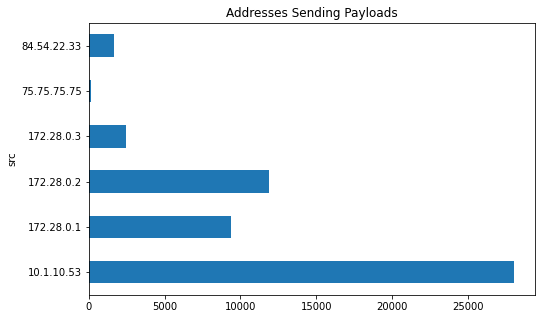

In [30]:
# Group by Source Address and Payload Sum
source_addresses = df.groupby("src")['payload'].sum()
source_addresses.plot(kind='barh',title="Addresses Sending Payloads",figsize=(8,5))

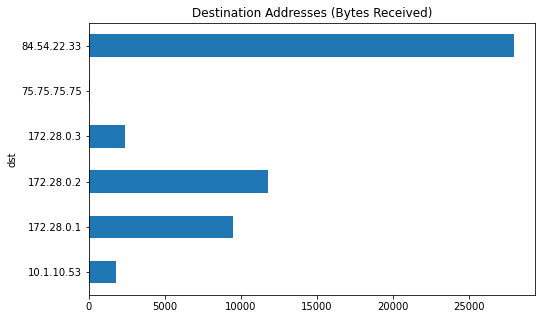

In [31]:
# Group by Destination Address and Payload Sum
destination_addresses = df.groupby("dst")['payload'].sum()
destination_addresses.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

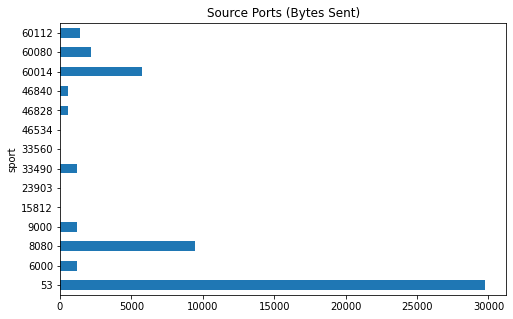

In [32]:
# Group by Source Port and Payload Sum
source_payloads = df.groupby("sport")['payload'].sum()
source_payloads.plot(kind='barh',title="Source Ports (Bytes Sent)",figsize=(8,5))

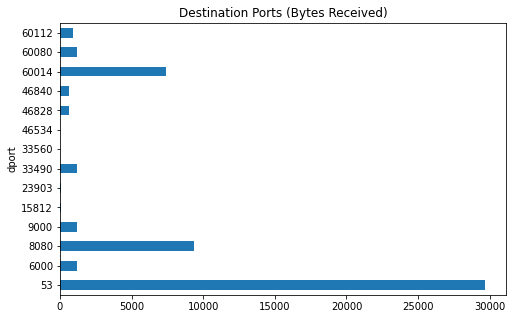

In [33]:
# Group by Destination Port and Payload Sum
destination_payloads = df.groupby("dport")['payload'].sum()
destination_payloads.plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))

Text(0.5, 1.0, 'History of bytes sent by most frequent address')

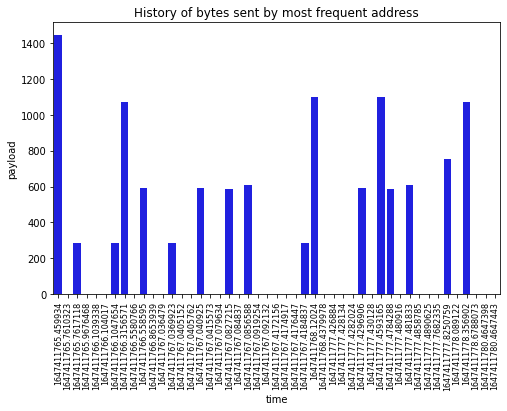

In [34]:
plt.figure(figsize=(8,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=8)

#groupby("time")['payload'].sum().plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))


frequent_address_df = df[df['src'] == frequent_address]
x = frequent_address_df['payload'].tolist()
sns.barplot(x="time", y="payload", data=frequent_address_df[['payload','time']],
            label="Total", color="b").set_title("History of bytes sent by most frequent address")


### Payload Investigation

172.28.0.1 May be a suspicious address


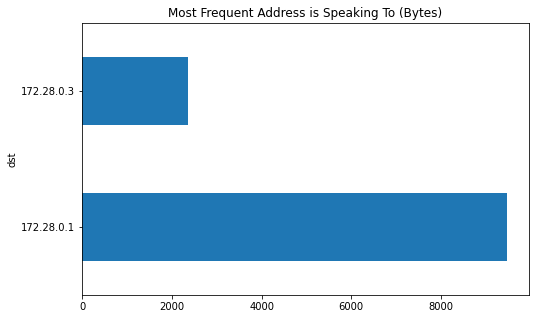

In [35]:
# Create dataframe with only converation from most frequent address
frequent_address_df = df[df['src']==frequent_address]

# Only display Src Address, Dst Address, and group by Payload 
frequent_address_groupby = frequent_address_df[['src','dst','payload']].groupby("dst")['payload'].sum()

# Plot the Frequent address is speaking to (By Payload)
frequent_address_groupby.plot(kind='barh',title="Most Frequent Address is Speaking To (Bytes)",figsize=(8,5))

# Which address has excahnged the most amount of bytes with most frequent address
suspicious_ip = frequent_address_groupby.sort_values(ascending=False).index[0]
print(suspicious_ip, "May be a suspicious address")

# Create dataframe with only conversation from most frequent address and suspicious address
suspicious_df = frequent_address_df[frequent_address_df['dst']==suspicious_ip]

In [36]:
# Store each payload in an array
raw_stream = []
for p in suspicious_df['payload_raw']:
    raw_stream.append(p)
    
print(raw_stream)

[b'HTTP/1.1 200 OK\r\nContent-Type: text/plain; charset=UTF-8\r\nContent-Encoding: gzip\r\nContent-Length: 1189\r\nAccess-Control-Allow-Origin: *\r\nSet-Cookie: io=Lkd3kmnrP950sb4qAAAA; Path=/; HttpOnly\r\nDate: Wed, 16 Mar 2022 06:22:45 GMT\r\nConnection: keep-alive\r\n\r\n\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x03\xed\x98]\x8f\xe3&\x14\x86\xff\xca(W\xad4Y\x03\xfe\x8e\xb4W\x95\xaaVj\xa5\xaa\xdd\xab\x1d\x8f,\x0c8\xb1\xc6\xc1^\x83\xa7\x93\xae\xf6\xbf\xf7\x80=;q\x9c\xe9&Lf\xaaJ\xbd\x88b\x0c\x87\xf3\xf0r8\x80\xa34]\x05\xc4SB\xa9\xaa\x91\xd77\x0bN5]\\\x7f\x1e\xfeW\x8b\xcf\xd9b#(\x17]\xb6X]Aa\xab\xd6y\xc5M![\x14\x94\x97<,\xd2e\x84\x05\x89\x02$R\x8c\x13\xccc\\2\x1a\xa4a\x82\xb2\xc5\xf5\xd5`\xa2w\xad\x18\x8c\x94\xa6\xbaWCM\xafD\'\xe9v\xacy*\x99\xba\x91h\xa8B\x94\xb0\xc2\xf7)x*\xe1\xa9d\x0c\x87\x9c#\x8cx\x89\xb1\x1f\xf2\xd1\x06\x98\xc7\xbe\x08"d\x89\xfc%\x8e>\xa0hE\xc8*\x08\xdf\xf9I\x18\x04\xc1\xc7\xa1\xe9\xbd\xe8\x9e\xba\x87\xbal\xf1\xe5\x91\xf5b\xc3ki\'\xa4\xce\x9f\xd5/\x88`,\xc8g\x05\xe7I\x10

### HTTP

In [37]:
http_df = df[df['dport'] == 8080]
http_df

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,676,5944,DF,0,64,6,51424,...,8,0,PA,501,23250,0,3,624,b'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
2,4,5,0,52,5945,DF,0,64,6,52047,...,8,0,A,501,22626,0,3,0,b'',b''
3,4,5,0,780,5946,DF,0,64,6,51318,...,8,0,PA,501,23354,0,3,728,b'POST /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
4,4,5,0,107,5947,DF,0,64,6,51990,...,8,0,PA,501,22681,0,3,55,"b'52:451-/debugger,[""data"",{""_placeholder"":tru...",b'35323a3435312d2f64656275676765722c5b22646174...
7,4,5,0,52,5948,DF,0,64,6,52044,...,8,0,A,501,22626,0,3,0,b'',b''
8,4,5,0,678,5949,DF,0,64,6,51417,...,8,0,PA,501,23252,0,3,626,b'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
10,4,5,0,780,11633,DF,0,64,6,45631,...,8,0,PA,501,23354,0,3,728,b'POST /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
12,4,5,0,126,11634,DF,0,64,6,46284,...,8,0,PA,501,22700,0,3,74,b'\x01\x07\x00\xff\x04Content-Length: 47\r\n\r...,b'010700ff04436f6e74656e742d4c656e6774683a2034...
15,4,5,0,52,11635,DF,0,64,6,46357,...,8,0,A,501,22626,0,3,0,b'',b''
17,4,5,0,52,5950,DF,0,64,6,52042,...,8,0,A,501,22626,0,3,0,b'',b''


In [38]:
http_req_df = http_df[http_df['payload_raw'].apply(lambda b: b is not b"")]
http_req_df

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,676,5944,DF,0,64,6,51424,...,8,0,PA,501,23250,0,3,624,b'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
3,4,5,0,780,5946,DF,0,64,6,51318,...,8,0,PA,501,23354,0,3,728,b'POST /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
4,4,5,0,107,5947,DF,0,64,6,51990,...,8,0,PA,501,22681,0,3,55,"b'52:451-/debugger,[""data"",{""_placeholder"":tru...",b'35323a3435312d2f64656275676765722c5b22646174...
8,4,5,0,678,5949,DF,0,64,6,51417,...,8,0,PA,501,23252,0,3,626,b'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
10,4,5,0,780,11633,DF,0,64,6,45631,...,8,0,PA,501,23354,0,3,728,b'POST /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
12,4,5,0,126,11634,DF,0,64,6,46284,...,8,0,PA,501,22700,0,3,74,b'\x01\x07\x00\xff\x04Content-Length: 47\r\n\r...,b'010700ff04436f6e74656e742d4c656e6774683a2034...
18,4,5,0,676,5951,DF,0,64,6,51417,...,8,0,PA,501,23250,0,3,624,b'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
22,4,5,0,676,5953,DF,0,64,6,51415,...,8,0,PA,501,23250,0,3,624,b'GET /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
24,4,5,0,782,11636,DF,0,64,6,45626,...,8,0,PA,501,23356,0,3,730,b'POST /socket.io/?EIO=3&sid=Lkd3kmnrP950sb4qA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
25,4,5,0,107,11637,DF,0,64,6,46300,...,8,0,PA,501,22681,0,3,55,"b'52:451-/debugger,[""data"",{""_placeholder"":tru...",b'35323a3435312d2f64656275676765722c5b22646174...


# Netflow Data Example


In [39]:
# https://www.kaggle.com/jsrojas/labeled-network-traffic-flows-114-applications

# https://www.kaggle.com/sampadab17/network-intrusion-detection-using-python/data

# https://www.kaggle.com/blakperlz/data-profiling-and-malware-traffic-detection/data